# **Imbalanced** **Data**

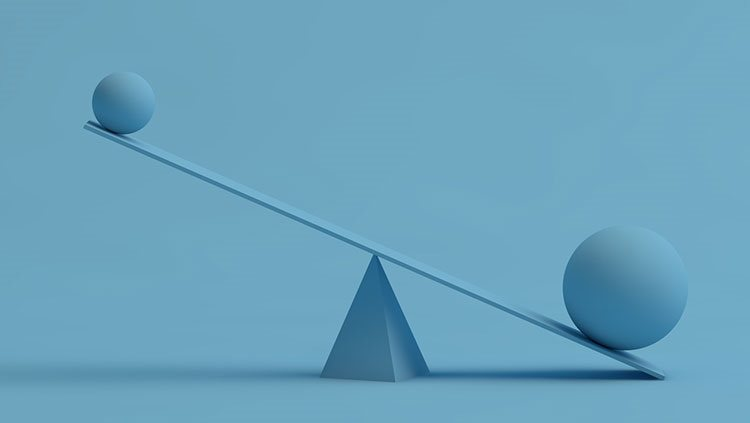

[Dataset](https://www.kaggle.com/datasets/dark06thunder/credit-card-dataset/data)

- **ID** - Client Number
- **GENDER** - M:Male , F:Female
- **CAR** - Owns car or NO
- **REALITY** - Is there a property
- **NO_OF_CHILD** - Number Of Children
- **INCOME** - Anually Income
- **EDUCATION_TYPE** - Educaiton Level
- **FAMILY_TYPE** - Marital Status
- **HOUSE_TYPE** - Way of Living
- **FLAG_MOBILE** - Is there a mobile phone
- **WORK_PHONE** - Is there a work phone
- **PHONE** - Is there a phone
- **OCCUPATION_TYPE** - Occupation
- **FAMILY_SIZE** - No. Of family members
- **BEGIN_MONTH** - The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
- **AGE** -  Age of the Client
- **YEARS_EMPLOYED** -  Years of working
- **Target** - Yes : 1, No : 0   // Yes - Fraud, No - Not_fraud

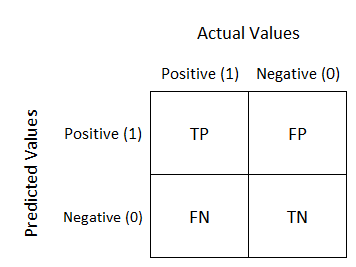

* **True Positives**: Correctly Classified Fraud Transactions
* **False Positives**: Incorrectly Classified Fraud Transactions
* **True Negative**: Correctly Classified Non-Fraud Transactions
* **False Negative**: Incorrectly Classified Non-Fraud Transactions
* **Precision**:   True Positives/(True Positives + False Positives)  
* **Recall**: True Positives/(True Positives + False Negatives)  
* Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect
* Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.


### Summary:
Precision starts to descend between 0.90 and 0.92 nevertheless, our precision score is still pretty high and still we have a descent recall score.

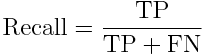

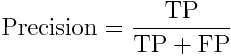

In [ ]:
!pip install -U imbalanced-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,f1_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.under_sampling import ClusterCentroids


In [ ]:


!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"abdullrahmantarek","key":"1527077bdc96d59098fc5b3595283c23"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadehsan000/global-electric-vehicle-sales-data-2010-2024  Global Electric Vehicle Sales Data (2010-2024)      83KB  2024-08-09 16:39:22           1747         30  1.0              
muhammadehsan000/healthcare-dataset-2019-2024                  Healthcare Dataset (2019-2024)                       3MB  2024-08-09 17:52:25           2169         47  1.0              
myrios/cost-of-living-index-by-country-by-number-2024          Cost of Living Index by Country                      3KB  2024-07-19 06:25:42           4709         69  1.0              
muhammadehsan000/olympic-historical-dataset-1896-2020          Olympic

In [ ]:
!kaggle datasets download -d dark06thunder/credit-card-dataset

Dataset URL: https://www.kaggle.com/datasets/dark06thunder/credit-card-dataset
License(s): unknown
credit-card-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip credit-card-dataset.zip

In [ ]:
df=pd.read_csv('credit_dataset.csv')

In [ ]:
df

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,11,48,7,1
25130,25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,2.0,23,34,4,1
25131,25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,2.0,32,34,4,1
25132,25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,9,49,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

In [ ]:
df.shape

(25134, 20)

In [ ]:
df['TARGET'].value_counts()

,count
TARGET,
0,24712
1,422


In [ ]:
data=df.copy()

In [ ]:
data.drop(['Unnamed: 0','ID'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          25134 non-null  object 
 1   CAR             25134 non-null  object 
 2   REALITY         25134 non-null  object 
 3   NO_OF_CHILD     25134 non-null  int64  
 4   INCOME          25134 non-null  float64
 5   INCOME_TYPE     25134 non-null  object 
 6   EDUCATION_TYPE  25134 non-null  object 
 7   FAMILY_TYPE     25134 non-null  object 
 8   HOUSE_TYPE      25134 non-null  object 
 9   FLAG_MOBIL      25134 non-null  int64  
 10  WORK_PHONE      25134 non-null  int64  
 11  PHONE           25134 non-null  int64  
 12  E_MAIL          25134 non-null  int64  
 13  FAMILY SIZE     25134 non-null  float64
 14  BEGIN_MONTH     25134 non-null  int64  
 15  AGE             25134 non-null  int64  
 16  YEARS_EMPLOYED  25134 non-null  int64  
 17  TARGET          25134 non-null 

In [ ]:
data['GENDER'] = data['GENDER'].astype('category')
data['GENDER'] =data['GENDER'].cat.codes
#1<<Male
#0<<female

In [ ]:
data['CAR'] = data['CAR'].astype('category')
data['CAR'] =data['CAR'].cat.codes
#1<<yes have a car
#0<<no

In [ ]:
data['REALITY'] = data['REALITY'].astype('category')
data['REALITY'] =data['REALITY'].cat.codes
#1<<yes
#0<<no

In [ ]:
data

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,1,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,11,48,7,1
25130,0,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,2.0,23,34,4,1
25131,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,2.0,32,34,4,1
25132,0,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,9,49,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GENDER          25134 non-null  int8   
 1   CAR             25134 non-null  int8   
 2   REALITY         25134 non-null  int8   
 3   NO_OF_CHILD     25134 non-null  int64  
 4   INCOME          25134 non-null  float64
 5   INCOME_TYPE     25134 non-null  object 
 6   EDUCATION_TYPE  25134 non-null  object 
 7   FAMILY_TYPE     25134 non-null  object 
 8   HOUSE_TYPE      25134 non-null  object 
 9   FLAG_MOBIL      25134 non-null  int64  
 10  WORK_PHONE      25134 non-null  int64  
 11  PHONE           25134 non-null  int64  
 12  E_MAIL          25134 non-null  int64  
 13  FAMILY SIZE     25134 non-null  float64
 14  BEGIN_MONTH     25134 non-null  int64  
 15  AGE             25134 non-null  int64  
 16  YEARS_EMPLOYED  25134 non-null  int64  
 17  TARGET          25134 non-null 

In [ ]:
data['INCOME_TYPE'].value_counts()

,count
INCOME_TYPE,
Working,15622
Commercial associate,7052
State servant,2437
Pensioner,13
Student,10


In [ ]:
data['INCOME_TYPE'] = data['INCOME_TYPE'].astype('category')

In [ ]:
data['EDUCATION_TYPE'].value_counts()

,count
EDUCATION_TYPE,
Secondary / secondary special,16808
Higher education,7132
Incomplete higher,993
Lower secondary,187
Academic degree,14


In [ ]:
data['EDUCATION_TYPE'] = data['EDUCATION_TYPE'].astype('category')

In [ ]:
data['FAMILY_TYPE'].value_counts()

,count
FAMILY_TYPE,
Married,17509
Single / not married,3445
Civil marriage,2133
Separated,1467
Widow,580


In [ ]:
data['FAMILY_TYPE'] = data['FAMILY_TYPE'].astype('category')

In [ ]:
data['HOUSE_TYPE'].value_counts()

,count
HOUSE_TYPE,
House / apartment,22102
With parents,1430
Municipal apartment,812
Rented apartment,439
Office apartment,199
Co-op apartment,152


In [ ]:
data['HOUSE_TYPE'] = data['HOUSE_TYPE'].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   GENDER          25134 non-null  int8    
 1   CAR             25134 non-null  int8    
 2   REALITY         25134 non-null  int8    
 3   NO_OF_CHILD     25134 non-null  int64   
 4   INCOME          25134 non-null  float64 
 5   INCOME_TYPE     25134 non-null  category
 6   EDUCATION_TYPE  25134 non-null  category
 7   FAMILY_TYPE     25134 non-null  category
 8   HOUSE_TYPE      25134 non-null  category
 9   FLAG_MOBIL      25134 non-null  int64   
 10  WORK_PHONE      25134 non-null  int64   
 11  PHONE           25134 non-null  int64   
 12  E_MAIL          25134 non-null  int64   
 13  FAMILY SIZE     25134 non-null  float64 
 14  BEGIN_MONTH     25134 non-null  int64   
 15  AGE             25134 non-null  int64   
 16  YEARS_EMPLOYED  25134 non-null  int64   
 17  TARGET      

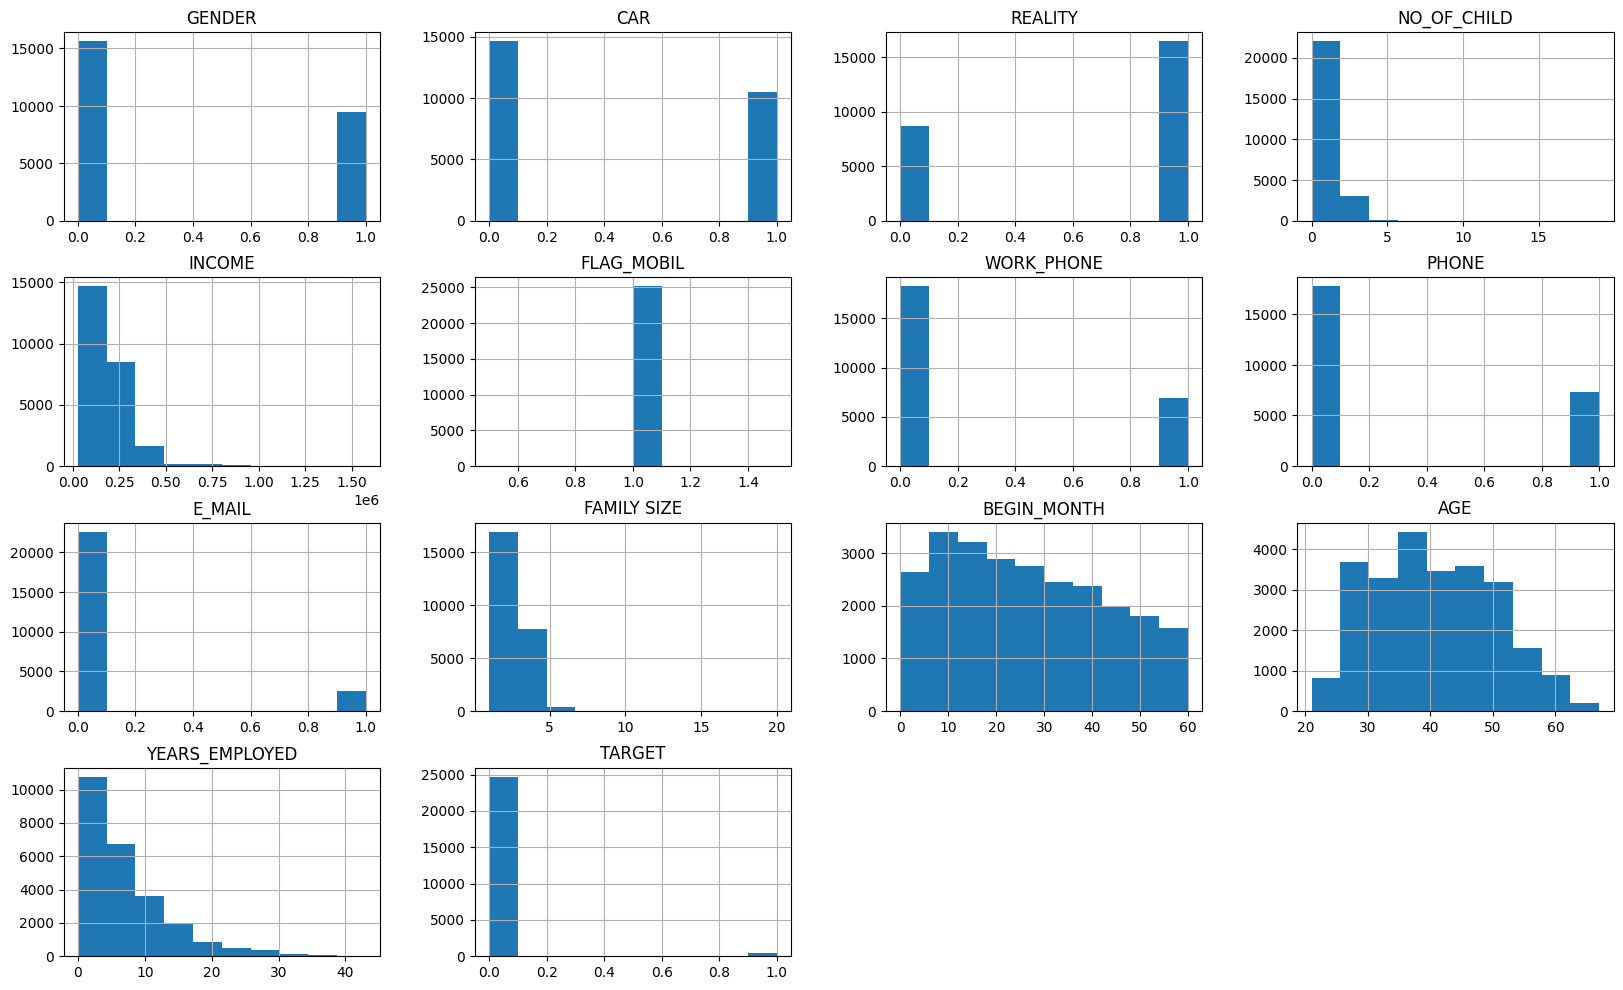

In [ ]:
data.hist(figsize=(20,12))
plt.show()

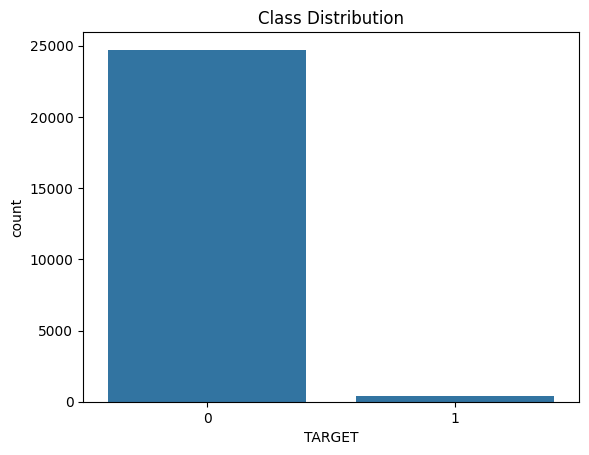

In [ ]:
sns.countplot(x='TARGET', data=df)
plt.title('Class Distribution')
plt.show()

Text(0.5, 1.0, 'Distribution')

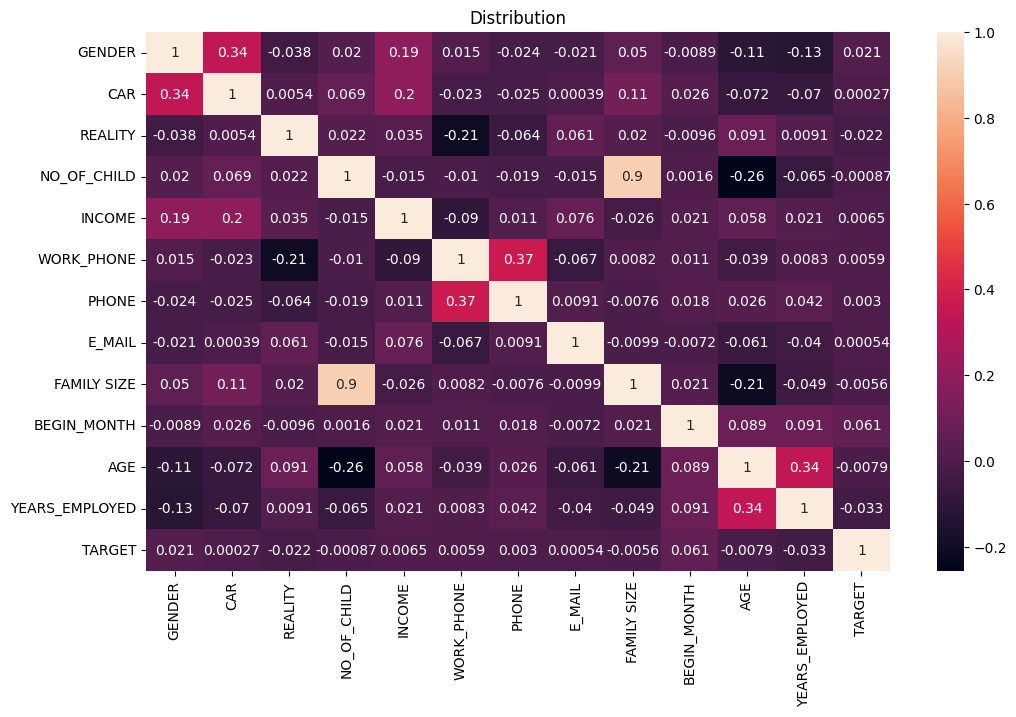

In [ ]:
plt.figure(figsize=(12,7))
numerical_data = data.select_dtypes(include=['number']).drop('FLAG_MOBIL', axis=1)
sns.heatmap(numerical_data.corr(),annot=True)
plt.title("Distribution")

In [ ]:
data_model=data.copy()

In [ ]:
data_model['INCOME_TYPE']=data_model['INCOME_TYPE'].cat.codes

In [ ]:
data_model['EDUCATION_TYPE']=data_model['EDUCATION_TYPE'].cat.codes

In [ ]:
data_model['FAMILY_TYPE']=data_model['FAMILY_TYPE'].cat.codes

In [ ]:
data_model['HOUSE_TYPE']=data_model['HOUSE_TYPE'].cat.codes

In [ ]:
x = data_model.drop("TARGET" , axis =1)
y = data_model['TARGET']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x,y  , test_size=0.25 , random_state=42 , stratify = y )

Confusion Matrix:
[[6084   94]
 [  93   13]]


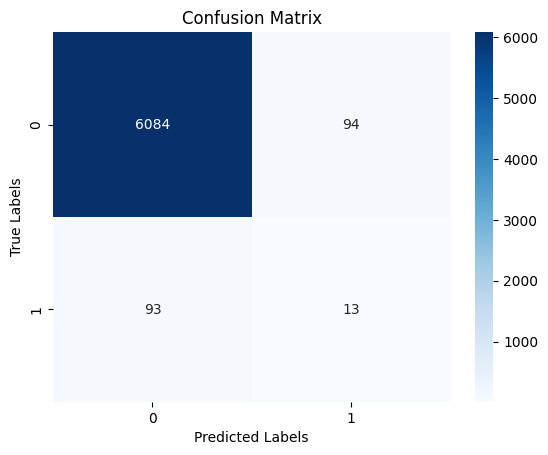

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6178
           1       0.12      0.12      0.12       106

    accuracy                           0.97      6284
   macro avg       0.55      0.55      0.55      6284
weighted avg       0.97      0.97      0.97      6284



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# تدريب نموذج Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# التنبؤ بالقيم على مجموعة الاختبار
y_pred = model.predict(X_test)

# إنشاء مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)

# طباعة مصفوفة الالتباس
print("Confusion Matrix:")
print(cm)

# عرض مصفوفة الالتباس باستخدام heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# تقرير التصنيف لمعرفة دقة النموذج وغيرها من المقاييس
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
#split

In [ ]:

def evaluate_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression(random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall, y_pred

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Majority Class', 'Minority Class'])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(title)
    plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


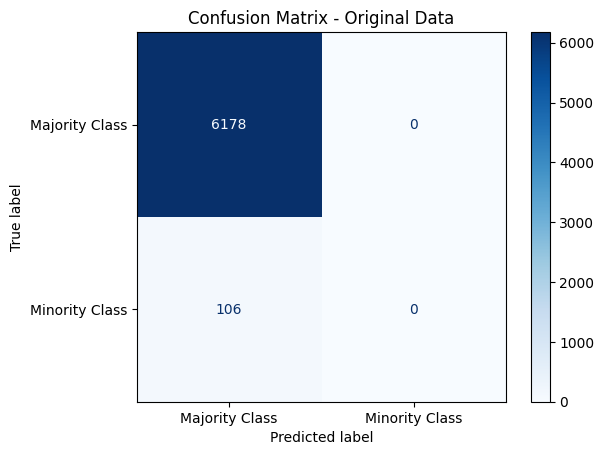

In [ ]:
# Evaluate model on original data
accuracy_original, precision_original, recall_original, y_pred_original = evaluate_model(X_train, y_train, X_test, y_test)

# Plot confusion matrix for original data
plot_confusion_matrix(y_test, y_pred_original, title='Confusion Matrix - Original Data')

# Collect results
results = {
    'Technique': ['Original'],
    'Accuracy': [accuracy_original],
    'Precision': [precision_original],
    'Recall': [recall_original],
    'Majority Class Count': [np.sum(y_train == 0)],
    'Minority Class Count': [np.sum(y_train == 1)],
    'Class Distribution (Minority/Majority Ratio)': [np.sum(y_train == 1) / np.sum(y_train == 0)]
}

df_results = pd.DataFrame(results)


![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

#Under-sampling the Majority Class


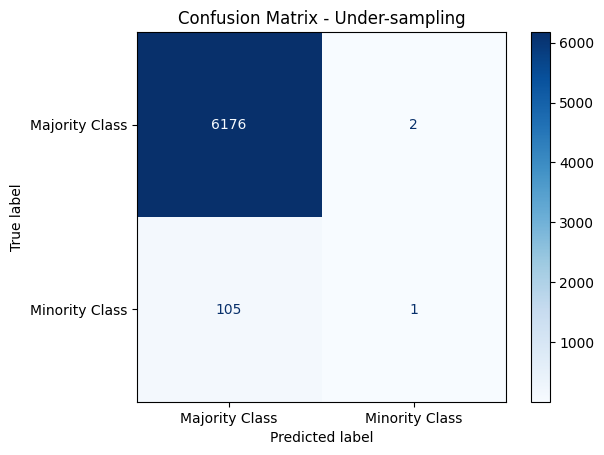

In [ ]:


# Apply Random Under-sampling
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=1)
X_res, y_res = rus.fit_resample(X_train, y_train)

# Evaluate model on under-sampled data
accuracy_rus, precision_rus, recall_rus, y_pred_rus = evaluate_model(X_res, y_res, X_test, y_test)

# Plot confusion matrix for under-sampled data
plot_confusion_matrix(y_test, y_pred_rus, title='Confusion Matrix - Under-sampling')

# Update results
results.update({
    'Technique': results['Technique'] + ['Under-sampling'],
    'Accuracy': results['Accuracy'] + [accuracy_rus],
    'Precision': results['Precision'] + [precision_rus],
    'Recall': results['Recall'] + [recall_rus],
    'Majority Class Count': results['Majority Class Count'] + [np.sum(y_res == 0)],
    'Minority Class Count': results['Minority Class Count'] + [np.sum(y_res == 1)],
    'Class Distribution (Minority/Majority Ratio)': results['Class Distribution (Minority/Majority Ratio)'] + [np.sum(y_res == 1) / np.sum(y_res == 0)]
})

df_results = pd.DataFrame(results)



#Near Miss

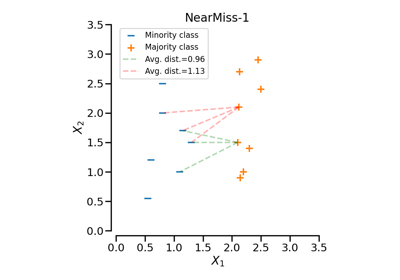

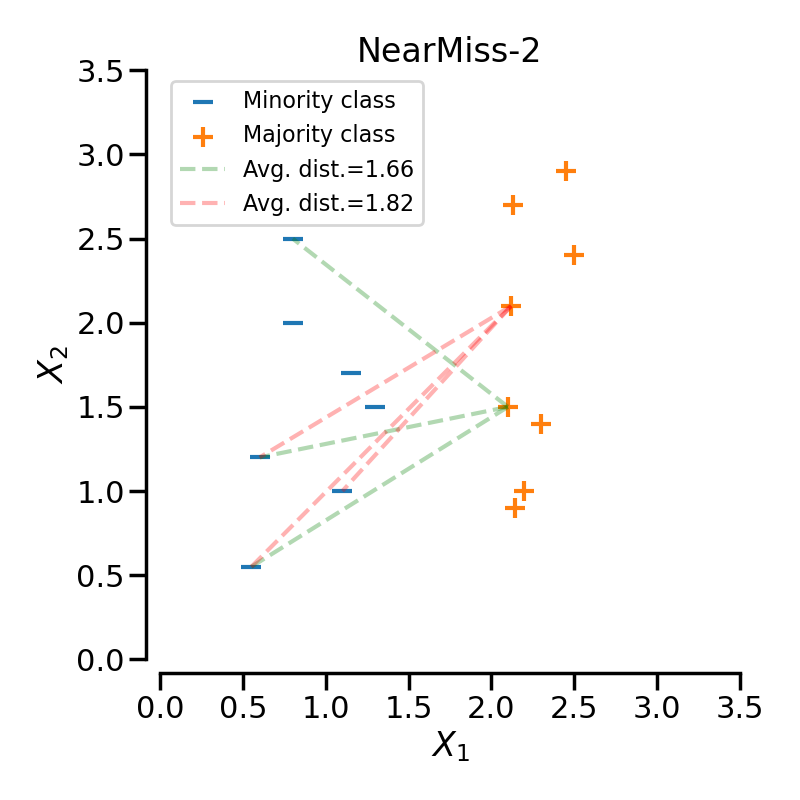

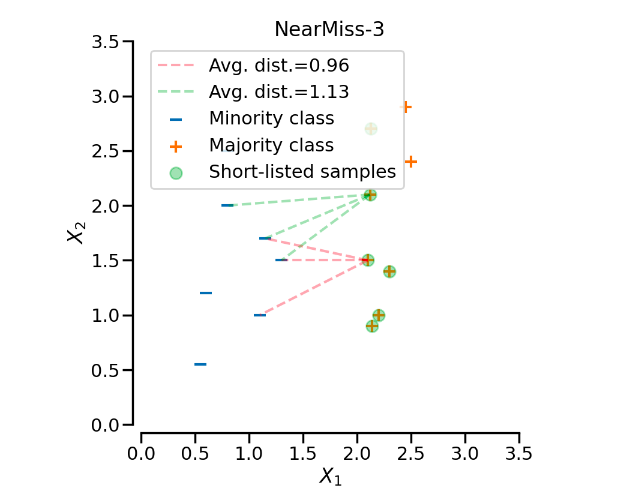

In [ ]:
# Apply NearMiss-1
near_miss_1 = NearMiss(version=1)
X_res_1, y_res_1 = near_miss_1.fit_resample(X_train, y_train)

print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution with NearMiss-1: {Counter(y_res_1)}")

Original class distribution: Counter({0: 18534, 1: 316})
Resampled class distribution with NearMiss-1: Counter({0: 316, 1: 316})


In [ ]:
# Apply NearMiss-2
near_miss_2 = NearMiss(version=2)
X_res_2, y_res_2 = near_miss_2.fit_resample(X_train, y_train)

print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution with NearMiss-2: {Counter(y_res_2)}")


Original class distribution: Counter({0: 18534, 1: 316})
Resampled class distribution with NearMiss-2: Counter({0: 316, 1: 316})


In [ ]:
# Apply NearMiss-3
near_miss_3 = NearMiss(version=3)
X_res_3, y_res_3 = near_miss_3.fit_resample(X_train, y_train)

print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution with NearMiss-3: {Counter(y_res_3)}")


Original class distribution: Counter({0: 18534, 1: 316})
Resampled class distribution with NearMiss-3: Counter({0: 316, 1: 316})


#Cluster Centroid

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


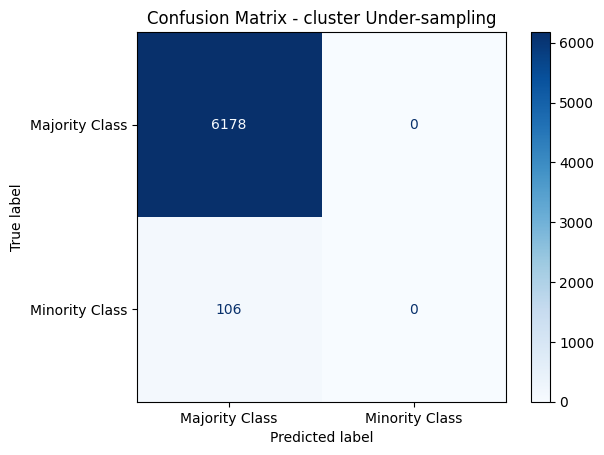

In [ ]:
# Apply Random Under-sampling
cluster = ClusterCentroids(sampling_strategy=0.5, random_state=1)
X_res, y_res = cluster.fit_resample(X_train, y_train)

# Evaluate model on under-sampled data
accuracy_cluster, precision_cluster, recall_cluster, y_pred_cluster = evaluate_model(X_res, y_res, X_test, y_test)

# Plot confusion matrix for under-sampled data
plot_confusion_matrix(y_test, y_pred_cluster, title='Confusion Matrix - cluster Under-sampling')

# Update results
results.update({
    'Technique': results['Technique'] + ['Under-sampling'],
    'Accuracy': results['Accuracy'] + [accuracy_rus],
    'Precision': results['Precision'] + [precision_rus],
    'Recall': results['Recall'] + [recall_rus],
    'Majority Class Count': results['Majority Class Count'] + [np.sum(y_res == 0)],
    'Minority Class Count': results['Minority Class Count'] + [np.sum(y_res == 1)],
    'Class Distribution (Minority/Majority Ratio)': results['Class Distribution (Minority/Majority Ratio)'] + [np.sum(y_res == 1) / np.sum(y_res == 0)]
})

df_results = pd.DataFrame(results)

#Over-sampling the Minority Class (SMOTE)


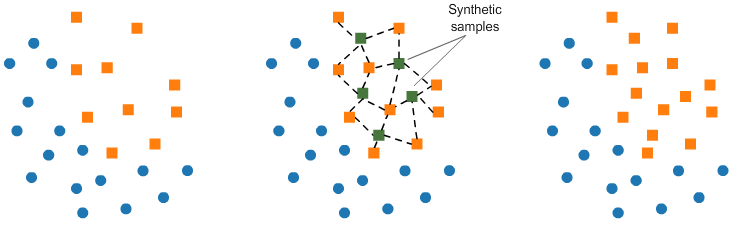

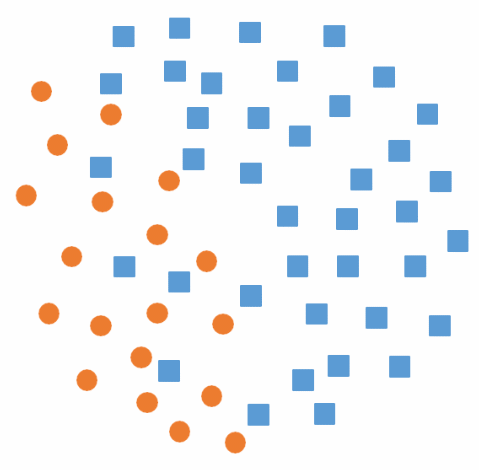

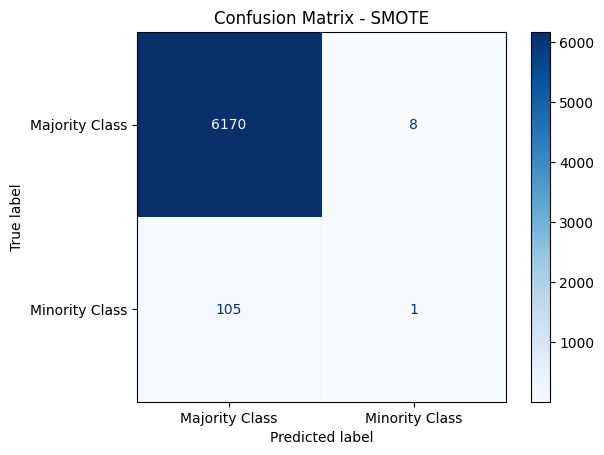

In [ ]:
# Apply SMOTE (Over-sampling)
smote = SMOTE(sampling_strategy=0.5, random_state=1)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Evaluate model on SMOTE data
accuracy_smote, precision_smote, recall_smote, y_pred_smote = evaluate_model(X_res, y_res, X_test, y_test)

# Plot confusion matrix for SMOTE data
plot_confusion_matrix(y_test, y_pred_smote, title='Confusion Matrix - SMOTE')

# Update results
results.update({
    'Technique': results['Technique'] + ['SMOTE'],
    'Accuracy': results['Accuracy'] + [accuracy_smote],
    'Precision': results['Precision'] + [precision_smote],
    'Recall': results['Recall'] + [recall_smote],
    'Majority Class Count': results['Majority Class Count'] + [np.sum(y_res == 0)],
    'Minority Class Count': results['Minority Class Count'] + [np.sum(y_res == 1)],
    'Class Distribution (Minority/Majority Ratio)': results['Class Distribution (Minority/Majority Ratio)'] + [np.sum(y_res == 1) / np.sum(y_res == 0)]
})

df_results = pd.DataFrame(results)


#5. Combination of Under-sampling and Over-sampling
# compination(smotetomek)


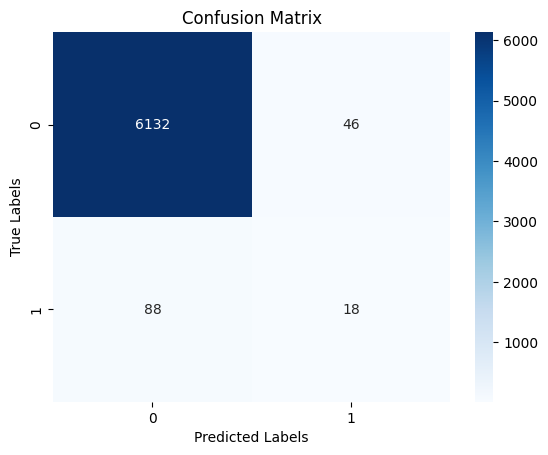

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6178
           1       0.28      0.17      0.21       106

    accuracy                           0.98      6284
   macro avg       0.63      0.58      0.60      6284
weighted avg       0.97      0.98      0.98      6284



In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Applying SMOTETomek to balance the dataset
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Train a Random Forest model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))




# Weighted class
```



Confusion Matrix:
[[6109   69]
 [  93   13]]


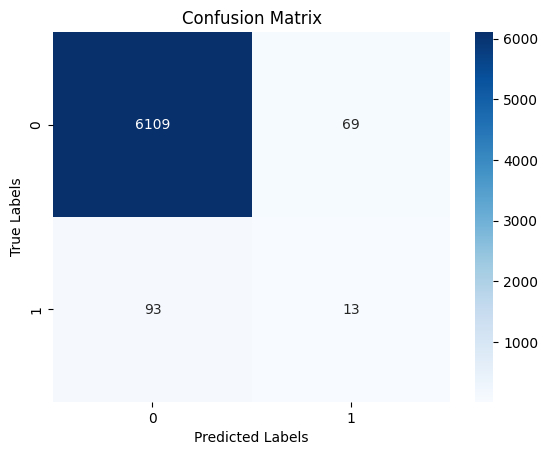

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6178
           1       0.16      0.12      0.14       106

    accuracy                           0.97      6284
   macro avg       0.57      0.56      0.56      6284
weighted avg       0.97      0.97      0.97      6284



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# استخدام class_weight='balanced' لتعديل الأوزان تلقائيًا وفقًا لتوزيع الفئات
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# تدريب النموذج
model.fit(X_train, y_train)

# التنبؤ بالقيم على مجموعة الاختبار
y_pred = model.predict(X_test)

# إنشاء مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)

# طباعة مصفوفة الالتباس
print("Confusion Matrix:")
print(cm)

# عرض مصفوفة الالتباس باستخدام heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# تقرير التصنيف لمعرفة دقة النموذج وغيرها من المقاييس
print("Classification Report:")
print(classification_report(y_test, y_pred))


#Ensemble

In [ ]:


# Initialize BalancedBaggingClassifier with a RandomForest base estimator
model = BalancedBaggingClassifier(
    estimator=RandomForestClassifier(random_state=42), # Use 'estimator' instead of 'base_estimator'
    n_estimators=10,
    random_state=4
)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

NameError: name 'BalancedBaggingClassifier' is not defined

8. Data Augmentation or Reduction


<ipython-input-53-57b6e49356b8>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.00739014 -0.05944384  0.75262117 ...  1.04390622  1.02780455
  0.95120178]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.
  X_train_augmented[y_train == 0] += np.random.normal(scale=0.1, size=X_train[y_train == 0].shape)
<ipython-input-53-57b6e49356b8>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.06662558  0.01369888 -0.08126902 ...  1.03700095  1.14673774
  1.08569644]' has dtype incompatible with int8, please explicitly cast to a compatible dtype first.
  X_train_augmented[y_train == 0] += np.random.normal(scale=0.1, size=X_train[y_train == 0].shape)
<ipython-input-53-57b6e49356b8>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.95227789

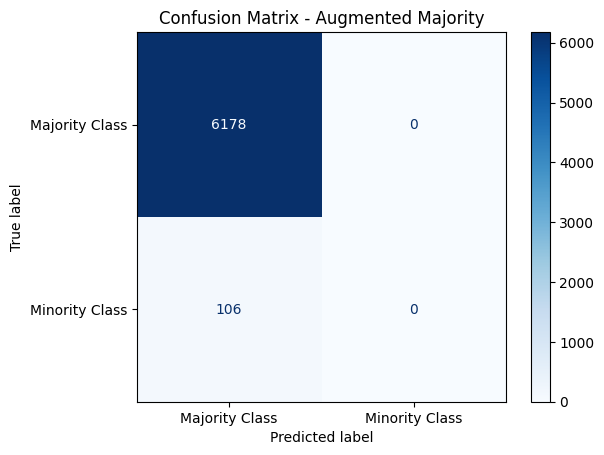

In [ ]:
# Augment Majority Class by adding noise
X_train_augmented = X_train.copy()
X_train_augmented[y_train == 0] += np.random.normal(scale=0.1, size=X_train[y_train == 0].shape)

# Evaluate model on augmented majority data
accuracy_augmented, precision_augmented, recall_augmented, y_pred_augmented = evaluate_model(X_train_augmented, y_train, X_test, y_test)

# Plot confusion matrix for augmented majority data
plot_confusion_matrix(y_test, y_pred_augmented, title='Confusion Matrix - Augmented Majority')

# Update results
results.update({
    'Technique': results['Technique'] + ['Augmented Majority'],
    'Accuracy': results['Accuracy'] + [accuracy_augmented],
    'Precision': results['Precision'] + [precision_augmented],
    'Recall': results['Recall'] + [recall_augmented],
    'Majority Class Count': results['Majority Class Count'] + [np.sum(y_train == 0)],
    'Minority Class Count': results['Minority Class Count'] + [np.sum(y_train == 1)],
    'Class Distribution (Minority/Majority Ratio)': results['Class Distribution (Minority/Majority Ratio)'] + [np.sum(y_train == 1) / np.sum(y_train == 0)]
})

df_results = pd.DataFrame(results)
